# Notebook 12: Data Scaling, Dimensionality Reduction, KNN

## Data Scaling

Machine learning algorithm just sees number. if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

<img src="images/scale.png" style="background-color:white;height:500px">

<img src="images/fruit.png" style="background-color:white;height:300px">

<p>These more significant number starts playing a more decisive role while training the model. Thus feature scaling is needed to bring every feature in the same footing without any upfront importance. Interestingly, if we convert the weight to “Kg,” then “Price” becomes dominant.</p>
<p>Another reason why feature scaling is applied is that few algorithms like Neural network gradient descent converge much faster with feature scaling than without it.</p>

In [1]:
#sources:
#https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/
#https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

### Normilize
normalization refers to rescaling an input variable to the range between 0 and 1.

In [2]:
# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [3]:
# Contrive small dataset
dataset = [[50, 30], [20, 90]]
print(dataset)
# Calculate min and max for each column
minmax = dataset_minmax(dataset)
print(minmax)
# Normalize columns
normalize_dataset(dataset, minmax)
print(dataset)

[[50, 30], [20, 90]]
[[20, 50], [30, 90]]
[[1.0, 0.0], [0.0, 1.0]]


In [4]:
from csv import reader
# Load a CSV file
def load_csv(filename):
	file = open(filename, "r")
	lines = reader(file)
	dataset = list(lines)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Load pima-indians-diabetes dataset
filename = 'datasets/pima-indians-diabetes.csv'
dataset = load_csv(filename)
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, len(dataset), len(dataset[0]) ) )

for i in range(len(dataset[0] ) ):
    str_column_to_float(dataset, i)

print(dataset[0])
# Calculate min and max for each column
minmax = dataset_minmax(dataset)
# Normalize columns
normalize_dataset(dataset, minmax)
print(dataset[0])

Loaded data file datasets/pima-indians-diabetes.csv with 768 rows and 9 columns
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
[0.35294117647058826, 0.7437185929648241, 0.5901639344262295, 0.35353535353535354, 0.0, 0.5007451564828614, 0.23441502988898377, 0.48333333333333334, 1.0]


### Standardize Data
Standardization is a rescaling technique that refers to centering the distribution of the data on the value 0 and the standard deviation to the value 1.

In [5]:
from math import sqrt

# calculate column means
def column_means(dataset):
	means = [0 for i in range(len(dataset[0]))]
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		means[i] = sum(col_values) / float(len(dataset))
	return means

# calculate column standard deviations
def column_stdevs(dataset, means):
	stdevs = [0 for i in range(len(dataset[0]))]
	for i in range(len(dataset[0])):
		variance = [pow(row[i]-means[i], 2) for row in dataset]
		stdevs[i] = sum(variance)
	stdevs = [sqrt(x/(float(len(dataset)-1))) for x in stdevs]
	return stdevs

# standardize dataset
def standardize_dataset(dataset, means, stdevs):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - means[i]) / stdevs[i]

In [6]:
# Standardize dataset
dataset = [[50, 30], [20, 90], [30, 50]]
print(dataset)
# Estimate mean and standard deviation
means = column_means(dataset)
stdevs = column_stdevs(dataset, means)
print(means)
print(stdevs)
# standardize dataset
standardize_dataset(dataset, means, stdevs)
print(dataset)

[[50, 30], [20, 90], [30, 50]]
[33.333333333333336, 56.666666666666664]
[15.275252316519467, 30.550504633038933]
[[1.0910894511799618, -0.8728715609439694], [-0.8728715609439697, 1.091089451179962], [-0.21821789023599253, -0.2182178902359923]]


In [7]:
# Load pima-indians-diabetes dataset
filename = 'datasets/pima-indians-diabetes.csv'
dataset = load_csv(filename)
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, len(dataset), len(dataset[0])) )
# convert string columns to float
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
print(dataset[0])
# Estimate mean and standard deviation
means = column_means(dataset)
stdevs = column_stdevs(dataset, means)
# standardize dataset
standardize_dataset(dataset, means, stdevs)
print(dataset[0])

Loaded data file datasets/pima-indians-diabetes.csv with 768 rows and 9 columns
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0]
[0.6395304921176576, 0.8477713205896718, 0.14954329852954296, 0.9066790623472505, -0.692439324724129, 0.2038799072674717, 0.468186870229798, 1.4250667195933604, 1.3650063669598067]


In [8]:
# Standardization is a scaling technique that assumes your data conforms to a normal distribution.
# If a given data attribute is normal or close to normal, this is probably the scaling method to use.
# Normalization is a scaling technique that does not assume any specific distribution.
#If your data is not normally distributed, consider normalizing it prior to applying your machine learning algorithm.

### Using Scikit-learn
1) Min Max Scaler
2) Standard Scaler
3) Max Abs Scaler
4) Robust Scaler
5) Quantile Transformer Scaler
6) Power Transformer Scaler
7) Unit Vector Scaler

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


#### Min-Max scaler
Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. This Scaler shrinks the data within the range of -1 to 1 if there are negative values. We can set the range like [0,1] or [0,5] or [-1,1].
<img src="images/minmax.png" style="background-color:white;height:100px">
<p >API: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html </p>

[[0.625 0.   ]
 [1.    0.5  ]
 [0.25  0.25 ]
 [0.    1.   ]]


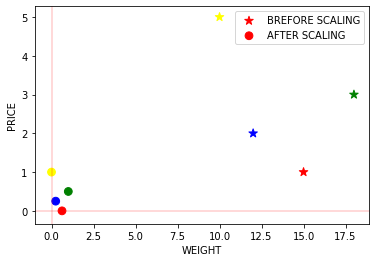

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df=scaler.fit_transform(df)
print(scaled_df)
df1 = pd.DataFrame(scaled_df,
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'],marker = '*',s=80, label='BREFORE SCALING');
df1.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax);
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

#### Standard Scaler

<p>The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1. </p>
<p>Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. If data is not normally distributed, this is not the best Scaler to use.</p>
<img src="images/standard.png" style="background-color:white;height:100px">
<p >API: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html </p>

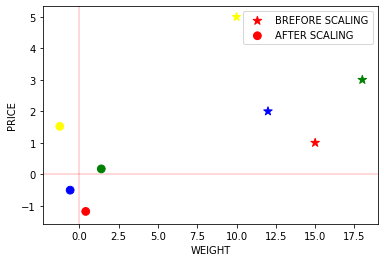

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df2.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2);

# Dimensionality Reduction
## Principal Component Analysis (PCA)

<p>Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.</p>
Used for:  Data Visualization, Speeding Machine Learning Algorithm

<p> Ref: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python </p>

In [12]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [13]:
breast_labels = breast.target
breast_labels.shape


(569,)

In [14]:
import numpy as np
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [15]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.columns = np.append(breast.feature_names,'label')
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [16]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [17]:
# How to visualize

In [18]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, breast.feature_names].values
x = StandardScaler().fit_transform(x) # normalizing the feature

In [19]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
principal_breast_Df.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [21]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

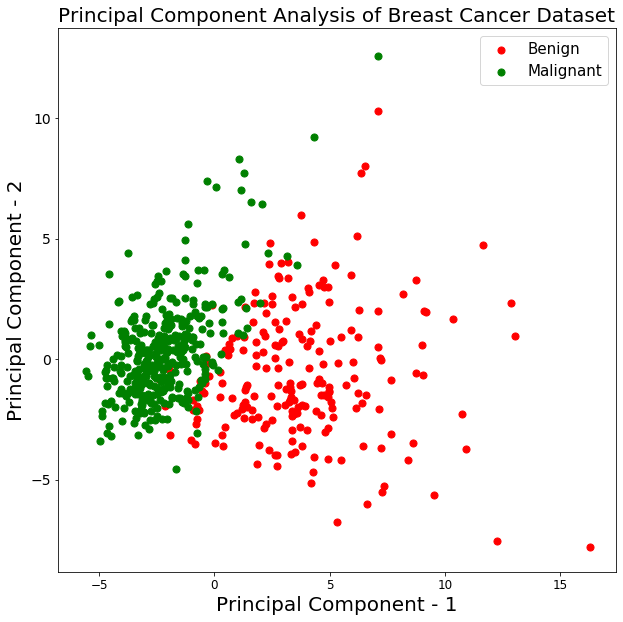

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

# k-Nearest Neighbors

<p>KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. <p>

<p>KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality. To deal with the problem of the curse of dimensionality, you need to perform principal component analysis.</p>

<p>Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.</p>
<img src="images/KNN.png" style="background-color:white;height:500px">
<p>Ref: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn</p>


In [23]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [24]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)
labels=le.fit_transform(play)
features=list(zip(weather_encoded,temp_encoded))
play_dataset=zip(features,labels)
print(features)
print(labels)


[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


<Figure size 432x288 with 0 Axes>

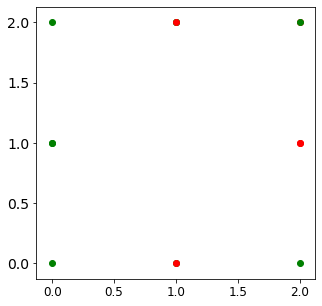

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

for target, label in play_dataset:
    #print(target, label)
    if label==0:
        plt.scatter(target[0], target[1] , c = 'r')
    else: 
        plt.scatter(target[0], target[1] , c = 'g')

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,labels)

#Predict Output
predicted= model.predict([[2,2]]) # 0:Overcast, 2:Mild
print(predicted)

[0]


In [27]:
from sklearn.datasets import make_blobs
centers = [[0.5, 0.5], [1.5, 1.5]]
blob_features, blob_labels = make_blobs(n_samples=20, centers=centers, n_features=2,cluster_std=0.4, random_state=40)
play_dataset=zip(blob_features,blob_labels)
print(blob_features,blob_labels)


[[ 1.41699614  0.69552402]
 [ 0.42039635 -0.00999344]
 [ 0.73531266  0.8540977 ]
 [ 0.09319719  0.44652279]
 [ 1.51108466  1.37184017]
 [ 1.16153184  1.32662843]
 [-0.23776041  0.31319903]
 [ 0.94830404  2.04856351]
 [ 2.12027169  1.37544843]
 [ 0.93027148  1.27860926]
 [ 1.51269071  2.00905595]
 [ 0.22615746  0.8714859 ]
 [ 0.25698092  0.44954543]
 [ 0.3247258   0.6973774 ]
 [ 1.61739766  1.54358012]
 [ 1.92857916  1.6663272 ]
 [ 0.9651862   1.58366887]
 [ 0.52162924  0.60318137]
 [ 0.7841068   0.92221378]
 [ 1.52991946  1.29775207]] [0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1]


<Figure size 432x288 with 0 Axes>

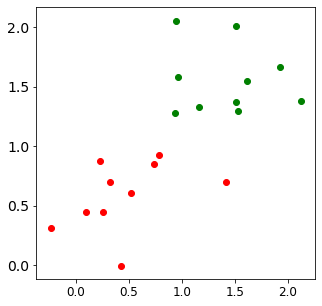

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

for target, label in play_dataset:
    #print(target, label)
    if label==0:
        plt.scatter(target[0], target[1] , c = 'r')
    else: 
        plt.scatter(target[0], target[1] , c = 'g')



In [29]:
from sklearn.neighbors import KNeighborsClassifier
model_1 = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
print(blob_features,blob_labels)
model_1.fit(blob_features,blob_labels)

#Predict Output
predicted= model_1.predict([[0.5,0.6]]) 
print(predicted)

[[ 1.41699614  0.69552402]
 [ 0.42039635 -0.00999344]
 [ 0.73531266  0.8540977 ]
 [ 0.09319719  0.44652279]
 [ 1.51108466  1.37184017]
 [ 1.16153184  1.32662843]
 [-0.23776041  0.31319903]
 [ 0.94830404  2.04856351]
 [ 2.12027169  1.37544843]
 [ 0.93027148  1.27860926]
 [ 1.51269071  2.00905595]
 [ 0.22615746  0.8714859 ]
 [ 0.25698092  0.44954543]
 [ 0.3247258   0.6973774 ]
 [ 1.61739766  1.54358012]
 [ 1.92857916  1.6663272 ]
 [ 0.9651862   1.58366887]
 [ 0.52162924  0.60318137]
 [ 0.7841068   0.92221378]
 [ 1.52991946  1.29775207]] [0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1]
[0]


In [30]:
breast.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model_3 = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model_3.fit(principal_breast_Df,breast.target)

#Predict Output
predicted= model_3.predict([[0,5]]) 
print(predicted)

[1]


## wine dataset

In [32]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [33]:
# print the names of the features
print(wine.feature_names)
# print the label species(class_0, class_1, class_2)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [34]:
# print the wine data (top 5 records)
print(wine.data[0:2])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]]


In [35]:
print(wine.data.shape)

(178, 13)


In [36]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.9)

In [37]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7204968944099379
